This notebook is a pipeline to perform Linear Regression using Gradient Descent.<br>
It has 4 parts:<br>
1. Simple Linear Regression using a single feature
2. Multiple Linear Regression using multiple features
3. Multiple linear Regression using all of the features
4. K-Fold cross validation

Firstly, let's import all the requirements

In [1]:
from src.preprocessing import load_dataset, add_bias_term, feature_scaling
from src.train_models import compute_cost, gradient_descent, train_simple_linear_model, train_multiple_linear_model, train_all_features_model, k_fold_cross_validation
from src.evaluate import visualize_model,visualize_cost, evaluate_model
from sklearn.model_selection import train_test_split

Load the dataset

In [2]:
filepath = 'dataset/student.csv'
df = load_dataset(filepath)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(df['studytime'])

0       2
1       2
2       2
3       3
4       2
       ..
1039    3
1040    2
1041    2
1042    1
1043    1
Name: studytime, Length: 1044, dtype: int64


Lets train and evaluate a Simple Regression Model using the studytime column

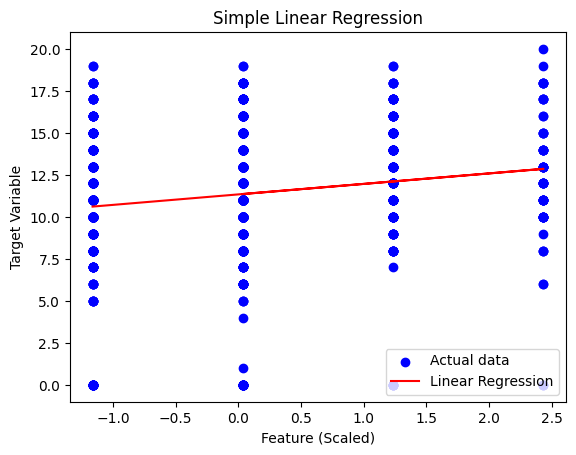

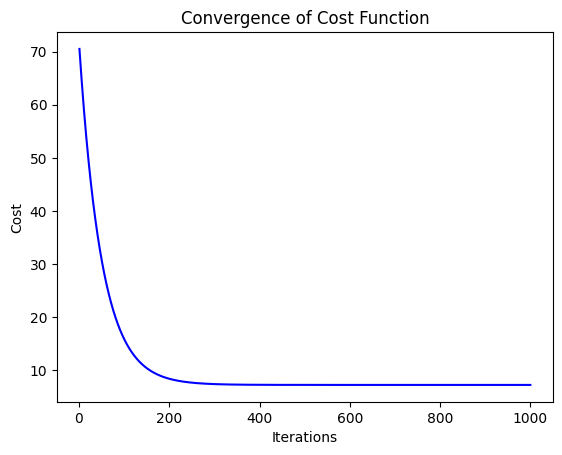

R2 Score: 0.02
Mean Absolute Error: 2.85


In [3]:
target_column = 'G3'
alpha = 0.01
iterations = 1000

# Train simple linear regression model
theta_optimized, cost_history, X, y, X_bias = train_simple_linear_model(filepath, 'studytime', target_column, alpha, iterations)

# Visualize the model
visualize_model(X, X_bias, y, theta_optimized, 'Simple Linear Regression', 'red')

# Visualize the convergence of the cost function
visualize_cost(iterations, cost_history)

# Split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Evaluate the model on the test set
evaluate_model(X_test, y_test, theta_optimized)

Let's do the same using multiple features

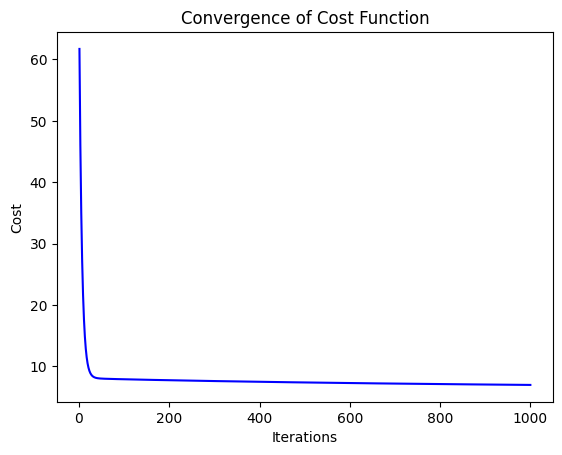

R2 Score: 0.06
Mean Absolute Error: 2.70


In [29]:
target_column = 'G3'
feature_columns = ['studytime', 'absences', 'Medu', 'Fedu', 'age', 'health', 'goout', 'traveltime', 'failures']
alpha = 0.01
iterations = 1000

# Train multiple linear regression model
theta_multi_optimized, cost_history_multi, X_multi, y_multi, X_bias_multi = train_multiple_linear_model(filepath, feature_columns, target_column, alpha, iterations)

# Visualize the model
#visualize_model(X_multi[:, 0], X_bias_multi, y_multi, theta_multi_optimized, 'Multiple Linear Regression', 'green')

# Visualize the convergence of the cost function
visualize_cost(iterations, cost_history_multi)

# Evaluate the multiple linear regression model on the test set
evaluate_model(X_bias_multi, y_multi, theta_multi_optimized)

Let's do it using all of the feature columns

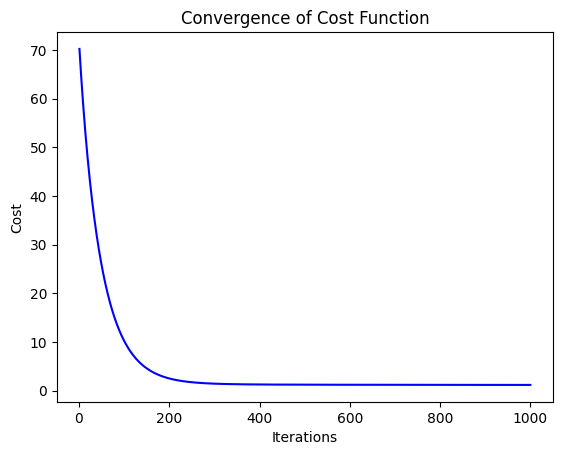

R2 Score: 0.84
Mean Absolute Error: 0.95


In [30]:
target_column = 'G3'
alpha = 0.01
iterations = 1000
theta_all, cost_history_all, X_all, y_all = train_all_features_model(filepath, target_column, alpha, iterations)
visualize_cost(iterations,cost_history_all)
evaluate_model(X_all,y_all,theta_all)

Great, it gives a very decent result.

Let's apply K-fold cross validation now.

In [31]:
# K-fold Cross-Validation
target_column = 'G3'
iterations = 1000
alpha_values = [0.001, 0.01, 0.025, 0.05 ,0.1, 0.25, 0.5]
my = k_fold_cross_validation(filepath, target_column, alpha_values, iterations)

Learning Rate: 0.001, Average R2 Score: -0.50
Learning Rate: 0.01, Average R2 Score: 0.83
Learning Rate: 0.025, Average R2 Score: 0.83
Learning Rate: 0.05, Average R2 Score: 0.83
Learning Rate: 0.1, Average R2 Score: 0.83
Learning Rate: 0.25, Average R2 Score: 0.83
Learning Rate: 0.5, Average R2 Score: 0.61


0.83 is the highest r2 score achieved.